The data below reads as follows:
    
    id corresponds to the index of each athlete
    
    Category corresponds to the sex and age bracket each runner falls in (i.e MAM = Male under 40 years, 
    WAM = Woman under 40 years, M40 = Male athlete between 40 and 45 years)
    
    km4week is the total number of kilometers run in the last 4 weeks before the marathon, marathon included.
    If, for example, the km4week is 100, the athlete has run 400 km in the four weeks before the marathon

    sp4week is the average speed of the athlete in the last 4 training weeks. The average counts all the kilometers
    done, included the slow kilometers done before and after the training. The average of the speed is 
    this number, and with time this is one of the numbers that has to be refined
    
    cross training: If the runner is also a cyclist, or a triathlete. How would training other disciplines affect 
    your timing?

    Wall21: In decimal. The tricky field. To acknowledge a good performance, as a marathoner, I have to run the 
    first half marathon with the same split of the second half. If, for example, I run the first half marathon 
    in 1h30m, I must finish the marathon in 3h (for doing a good job). If I finish in 3h20m, I started too fast
    and I hit "the wall". My training history is, therefore, less valid, since I was not estimating my result

    Marathon time: In decimal. This is the final result. Based on the training history, the marathon timing must 
    be predicted.


In [130]:
import pandas as pd

running_data = pd.read_csv('MarathonData.csv')
running_data.drop(['id', 'Wall21', 'CATEGORY'], axis=1, inplace=True)

running_data

,Marathon,Name,Category,km4week,sp4week,CrossTraining,MarathonTime
0,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,2.37
1,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,2.59
2,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,2.66
3,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,2.68
4,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,2.74
...,...,...,...,...,...,...,...
82,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,3.93
83,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,3.93
84,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,3.94
85,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,3.95


In [131]:
running_data.describe().T

,count,mean,std,min,25%,50%,75%,max
km4week,87.0,62.347126,26.956019,17.900000,44.200000,58.800000,77.500000,137.50
sp4week,87.0,139.840706,1191.427864,8.031414,11.498168,12.163424,12.854036,11125.00
MarathonTime,87.0,3.319080,0.376923,2.370000,3.045000,3.320000,3.605000,3.98


In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

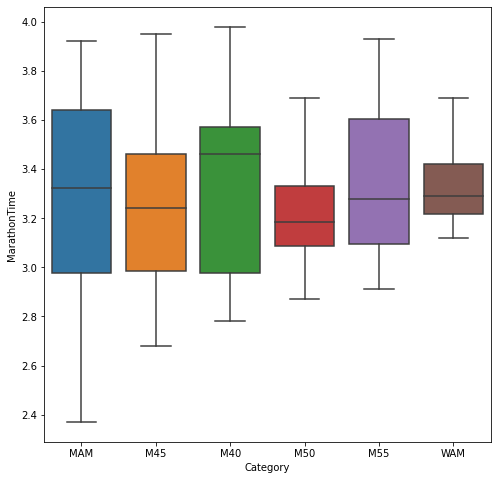

In [133]:
# Lets see the box plot
# It is very useful to handle the ouliers

# Lets create a box-plot of Category and MarathonTIme
plt.figure(figsize=(8,8))
sns.boxplot(x='Category',y='MarathonTime',data=running_data)
plt.show()

The box-plot above of marathon timing and the category corresponding to the sex and age bracket each runner falls in provides the model with crucial information. The variation in marathon timing between the categories is significant and plays a role in training the model.

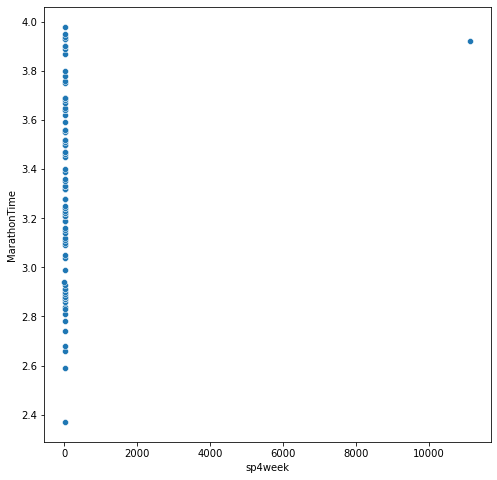

In [134]:
# Lets see the scatter plot
# Lets create scatterplot of sp4week and MarathonTime

plt.figure(figsize=(8,8))
sns.scatterplot(x='sp4week',y='MarathonTime',data=running_data)
plt.show()

In [135]:
running_data["sp4week"].mode()

0         8.031414
1         8.337931
2         9.907734
3        10.053269
4        10.130653
          ...     
82       14.078947
83       14.336538
84       14.434783
85       14.970492
86    11125.000000
Name: sp4week, Length: 87, dtype: float64

A clear outlier is present in the scatter plot for average speed and marathon timing illustrated above. We will deal with this by writing a function with the help of z-score to detect the outlier in our data and deal with it accordingly.

In [136]:
# Detect outliers present in the dataframe
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


# We now pass the dataset column that needs to be dealt with as 
# an input argument to the detect_outlier function

outlier_datapoints = detect_outlier(running_data["sp4week"])

print(outlier_datapoints)


[11125.0]


In [137]:
# Remove outliers from the dataframe
# running_data.drop(running_data.index[running_data['sp4week'] == [int(x) for x in outlier_datapoints]], inplace = True)
running_data.drop(running_data.index[running_data['sp4week'] == 11125.0], inplace = True)
running_data = running_data.reset_index(drop=True)
running_data

,Marathon,Name,Category,km4week,sp4week,CrossTraining,MarathonTime
0,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,2.37
1,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,2.59
2,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,2.66
3,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,2.68
4,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,2.74
...,...,...,...,...,...,...,...
81,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,3.93
82,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,3.93
83,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,3.94
84,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,3.95


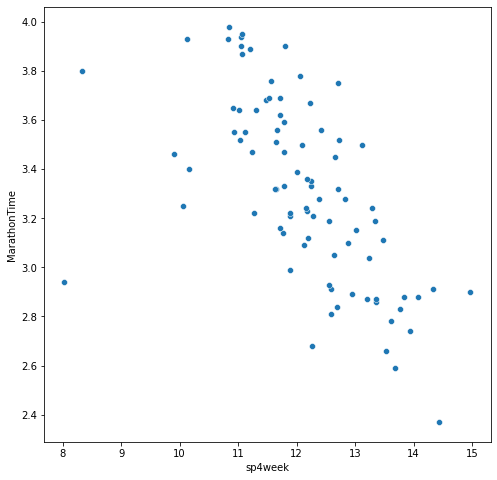

In [138]:
# Lets see the scatter plot
# Lets create scatterplot of sp4week and MarathonTime

plt.figure(figsize=(8,8))
sns.scatterplot(x='sp4week',y='MarathonTime',data=running_data)
plt.show()

After we cleaned the above data, it is evident that there is a relationship between an athletes average speed and their marathon timing. There exists a negative correlation between marathon timing and average speed. The higher an athletes average speed, the lower their marathon timing. 

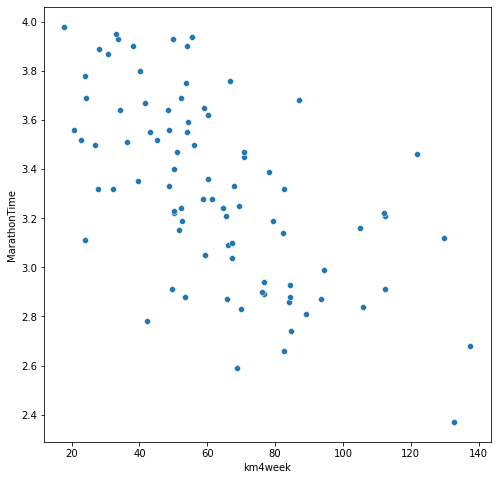

In [139]:
# Lets see the scatter plot
# Lets create scatterplot of km4week and MarathonTime

plt.figure(figsize=(8,8))
sns.scatterplot(x='km4week',y='MarathonTime',data=running_data)
plt.show()

There is a negative correlation between an athletes total kms run and their marathon timing. The more an athlete trained in the 4 weeks prior to the marathon, the quicker they managed to run in their marathon.

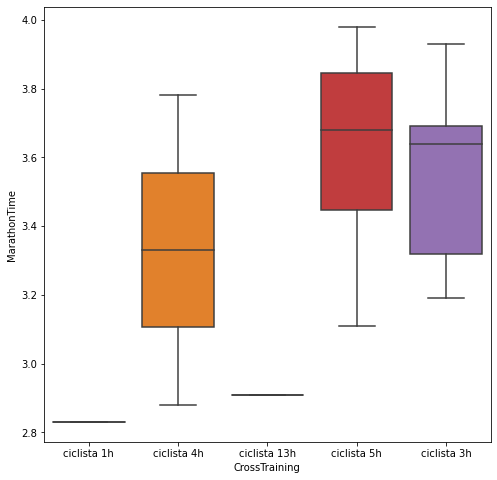

In [140]:
# Lets see the box plot
# It is very useful to handle the ouliers

# Lets create box-plot of CrossTraining and MarathonTIme
plt.figure(figsize=(8,8))
sns.boxplot(x='CrossTraining',y='MarathonTime',data=running_data)
plt.show()

The box-plot above of an athletes cross training (training other disciplines during their marathon training) provides us with little information as the datapoints are small. However, as we see new datapoints in the future, the model will pick up on the effect this additional training may have and could play a role in the improvement of the prediction model.

In [141]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
running_data['Marathon'] = label_encoder.fit_transform(running_data['Marathon']) + 1
running_data['Category'] = label_encoder.fit_transform(running_data['Category'])
running_data['CrossTraining'] = label_encoder.fit_transform(running_data['CrossTraining'])

In [142]:
running_data

,Marathon,Name,Category,km4week,sp4week,CrossTraining,MarathonTime
0,1,Blair MORGAN,4,132.8,14.434783,5,2.37
1,1,Robert Heczko,4,68.6,13.674419,5,2.59
2,1,Michon Jerome,4,82.7,13.520436,5,2.66
3,1,Daniel Or lek,1,137.5,12.258544,5,2.68
4,1,Luk ? Mr zek,4,84.6,13.945055,5,2.74
...,...,...,...,...,...,...,...
81,1,Stefano Vegliani,3,50.0,10.830325,5,3.93
82,1,Andrej Madliak,0,33.6,10.130653,2,3.93
83,1,Yoi Ohsako,0,55.4,11.043189,5,3.94
84,1,Simon Dunn,1,33.2,11.066667,5,3.95


The above data is cleaned using feature engineering to transform categorical variables to numerical variables. This will allow the data to form patterns in the features that coreespond to a marathon timing.

Marathon was initialised with +1 as it is the first datapoint the model is viewing in terms of marathons. As the model starts to see new data, each new marathon viewed will be set to the consequent number of the viewed datapoints. ALthough the marathon plays no role in the current model, as the model begins to see new data, the marathon being run could play a role in the prediction.

As there are a finite number of categories it is easy to keep track of what numerical value corresponds to a category, this will allow us to correctly place new data in the right categories.

Although crosstraining could have several variations of datapoints, we will use a simplified method to track each datapoint by dividing them up by cycling, swimming. We can then assign the time spent on each activity to the different crosstraining disciplines and output numerical values for the model to pick up on.

In [143]:
# Create target object and call it y
y = running_data['MarathonTime']

# Create X
features = ['Marathon', 'Category', 'km4week', 'sp4week', 'CrossTraining']
X = running_data[features]

In [144]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [145]:
from sklearn.tree import DecisionTreeRegressor

running_pred_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
running_pred_model.fit(train_X, train_y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

In [146]:
val_predictions = running_pred_model.predict(val_X)

In [147]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

val_mae = mean_absolute_error(val_y, val_predictions)
val_mae

0.2509090909090909

In [148]:
val_mape = mean_absolute_percentage_error(val_y, val_predictions)
val_mape

0.07446942564204753

In [149]:
from sklearn.ensemble import RandomForestRegressor

#Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

#fit the model
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [150]:
rf_val_predictions = rf_model.predict(val_X)

In [151]:
# Calculate the mean absolute error of the Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y, rf_val_predictions)
rf_val_mae

0.18783636363636302

In [152]:
rf_val_mape = mean_absolute_percentage_error(rf_val_predictions, val_y)
rf_val_mape

0.054871269473882815